In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
marketsales = pd.read_csv('supermarket_sales.csv')

In [5]:
marketsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#1000 rows and 17 columns in the dataset
marketsales.shape

(1000, 17)

In [73]:
marketsales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Hour,Day Of Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,0,Sat
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,0,Fri
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,0,Sun
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,0,Sun
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,0,Fri


In [69]:
marketsales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Hour,Day Of Week
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,0,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,0,5
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,0,5
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,0,4
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,...,13:28,Cash,618.38,4.761905,30.9190,6.6,2019,2,0,0


49.65

In [14]:
#what information can I get where the purchase was made in gross income
#branch C had the highest gross income sale, made by a female, and she purchased fashion accessoris

marketsales[marketsales['gross income']==marketsales['gross income'].max()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6


In [15]:
#lets see where we can find the lowest gross income
#interesting this was done by a male who purchased sports travel

marketsales[marketsales['gross income']==marketsales['gross income'].min()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9


In [23]:
#now I want to arrange the data based on product line to see which product gave the highest gross income
#interesting we can see that the greatest gross income irrespective of the branch and gender was the purchase of food and beverages
marketsales.groupby('Product line').sum()['gross income']


Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

In [19]:
#lets do the same to set which gender resulted in a higher gross income? male or female?
marketsales.groupby('Gender').sum()['gross income']
#this isnt hard to believe women do spend more

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64

In [67]:
#naypitaw had the highest gross income
marketsales.groupby('City').sum()['gross income']

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

In [68]:
#member resulted in a greater gross income
marketsales.groupby('Customer type').sum()['gross income']

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

In [24]:
#lets figure out which branch produces the highest gross income?
marketsales.groupby('Branch').sum()['gross income']
#branch C results in the highest gross income 

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

In [ ]:
marketsales.groupby('Gender').sum()['gross income']

In [26]:
#now lets figure out which was the most common method of payment for the customers
#Ewallet was the most common source of payments
marketsales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [28]:
#lets look at date time now
import datetime as dt
print(marketsales['Date'].dtypes)

object


In [34]:
marketsales['Date']= pd.to_datetime(marketsales['Date'])
marketsales['Year']= marketsales['Date'].dt.year

marketsales['Month']= marketsales['Date'].dt.month

marketsales['Day Of Week'] = marketsales['Date'].dt.dayofweek

marketsales['Hour']= marketsales['Date'].dt.hour

marketsales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day Of Week,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,1,0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,5,0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,5,0
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,4,0


In [54]:
#the day of weeks are mapped as integers lets first convert it to values
marketsales['Day Of Week'] = marketsales['Date'].dt.dayofweek
marketsales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Hour,Day Of Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,0,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,0,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,0,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,0,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,0,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,0,5
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,0,5
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,0,4


In [71]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
marketsales['Day Of Week'] = marketsales['Day Of Week'].map(dmap)


In [60]:
#now we have converted day of week and month we can figure out what month and what week where the greatest total purchases occuring 
#lets see at what month was the  greatest cogs done
marketsales.groupby('Month').sum()['cogs']
#interesting so Jan was when the highest purchases occured


Month
1    110754.16
2     92589.88
3    104243.34
Name: cogs, dtype: float64

In [61]:
marketsales.groupby('Day Of Week').sum()['cogs']
#saturday was when the highest purchases where done, and second highest purchases were done on a tuesday

Day Of Week
0    36094.36
1    49030.71
2    41648.70
3    43189.76
4    41834.61
5    53448.39
6    42340.85
Name: cogs, dtype: float64

<AxesSubplot:xlabel='Day Of Week', ylabel='count'>

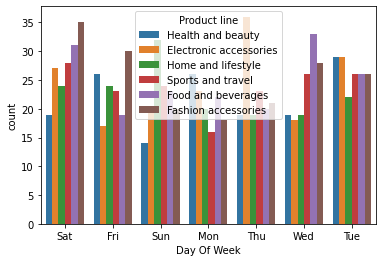

In [72]:
#count plot to understand at what day what products where sold the most 
sns.countplot(x='Day Of Week',hue='Product line',data=marketsales)

<AxesSubplot:xlabel='Month', ylabel='count'>

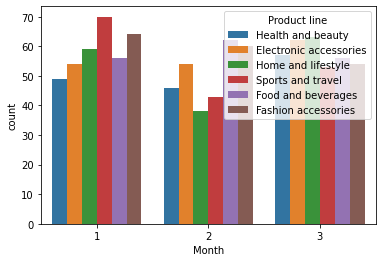

In [66]:
sns.countplot(x='Month',hue='Product line',data=marketsales)

In [78]:
#lets assign categories to our gross incomes as #high, medium, low and then target to see at what day each day was gross income high medium low
def function(target):
    if (target >= 45):
        return 'high'
    elif (target >=35):
        return 'medium'
    elif (target >=10):
        return 'low'
    else:
        return 'unacceptable'

In [80]:
marketsales['target']=marketsales['gross income'].apply(lambda x:function(x))
marketsales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Hour,Day Of Week,target
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,0,Sat,low
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,3,0,Fri,unacceptable
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019,3,0,Sun,low
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,0,Sun,low
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,0,Fri,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,0,Tue,unacceptable
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,0,Sat,high
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,4.761905,1.5920,7.7,2019,2,0,Sat,unacceptable
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,4.761905,3.2910,4.1,2019,2,0,Fri,unacceptable


<AxesSubplot:xlabel='Month', ylabel='count'>

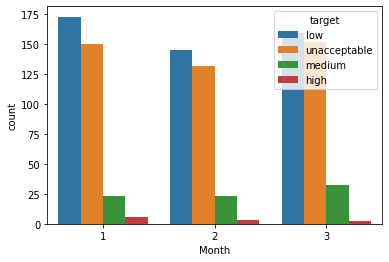

In [81]:
sns.countplot(x='Month',hue='target',data=marketsales)

<AxesSubplot:xlabel='Day Of Week', ylabel='count'>

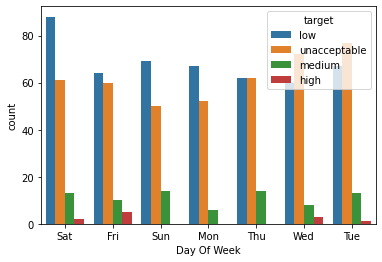

In [82]:
sns.countplot(x='Day Of Week',hue='target',data=marketsales)